#Congressional Voting Data


The task is to train a model that can recognize that the politician is republican or democrat based on voting results. We would follow the general machine learning steps that were described in the lecture.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/MPA-MLF/Exercises/main/Lab_05/voting_complete.csv')
df.columns[0]

'Unnamed: 0'

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.columns[0]
df.iloc[:,0]

0      republican
1      republican
2        democrat
3        democrat
4        democrat
          ...    
430    republican
431      democrat
432    republican
433    republican
434    republican
Name: Class Name, Length: 435, dtype: object

In [ ]:
def rename(x):
  if x=='y' or x=='republican':
    x=1
  elif x=='n':
    x=-1
  elif x=='?' or x=='democrat':
    x=0
  
  return x

df_int = df.applymap(rename)

In [ ]:
# define a function for train and test split //   he called the DataFrame >> PD_DATASET

def train_test_split(pd_data: pd.DataFrame, test_ratio: float = 0.2) -> tuple:
    pd_dataset = pd_data.copy()

    # pd_dataset = pd_dataset[pd_dataset.columns[1:]] # I am skiping this because i have already did it with "df.drop()"

    index = np.arange(len(pd_dataset))                # Creating an index wit the size of our DataFrame 
    index = np.random.permutation(index)              # Random organization of the index array
    train_ammount = int(len(index)*test_ratio)        # Applies the test_ratio of 20% to our data and split it in entire numbers with "int()"
    train_ids = index[train_ammount:]                 
    test_ids = index[:train_ammount]
    
    train_dataset = pd_dataset[pd_dataset.index.isin(train_ids)].reset_index()    # When reseting the index, it is created a new column storing the previous index 
    test_dataset = pd_dataset[pd_dataset.index.isin(test_ids)].reset_index()      # we are substituting, so we will have to take that in count for the output of the func.
    
    train_dataset = train_dataset[train_dataset.columns[1:]]      # Skiping the values about 'Class Name' column {'Republican','Democrat'}
    test_dataset = test_dataset[test_dataset.columns[1:]]         # because we're just interested in play with the 'yes' and 'no' data for our model

    
    
    return train_dataset[train_dataset.columns[1:]], train_dataset[train_dataset.columns[0]], test_dataset[test_dataset.columns[1:]], test_dataset[test_dataset.columns[0]]

In [ ]:
x_train, y_train, x_test, y_test = train_test_split(df_int)

#Data examination
The task would be to examine the dataset. Check:

1. Is it a classification or regression task?
2. How many data samples do we have?
3. How many features do we have?
4. What data types do we have in our dataset?
5. Are there any missing values?
6. How many labels do we have?

1. Regression helps predict a continuous quantity, classification predicts discrete class labels, in this case we just want to predict the 'class' of politician [Republican or Democrat] based on the voting data [Yes, No or Abstention (?)]. So is it a case of Classification.

In [ ]:
print(df.shape)

(435, 17)


2. We have a total of 435 samples.

3. Where each of that samples are taken over 17 features (taking in count the class of politician) where the 1st one is the class and the 16 after are voting topics.


In [ ]:
print(df.dtypes)

Class Name                                object
handicapped-infants                       object
water-project-cost-sharing                object
adoption-of-the-budget-resolution         object
physician-fee-freeze                      object
el-salvador-aid                           object
religious-groups-in-schools               object
anti-satellite-test-ban                   object
aid-to-nicaraguan-contras                 object
mx-missile                                object
immigration                               object
synfuels-corporation-cutback              object
education-spending                        object
superfund-right-to-sue                    object
crime                                     object
duty-free-exports                         object
export-administration-act-south-africa    object
dtype: object


In [ ]:
print(df_int.dtypes)

Class Name                                int64
handicapped-infants                       int64
water-project-cost-sharing                int64
adoption-of-the-budget-resolution         int64
physician-fee-freeze                      int64
el-salvador-aid                           int64
religious-groups-in-schools               int64
anti-satellite-test-ban                   int64
aid-to-nicaraguan-contras                 int64
mx-missile                                int64
immigration                               int64
synfuels-corporation-cutback              int64
education-spending                        int64
superfund-right-to-sue                    int64
crime                                     int64
duty-free-exports                         int64
export-administration-act-south-africa    int64
dtype: object


4. When you import data into a Pandas DataFrame, the columns with text are by default marked as Object datatype

 Later on the preprocessing of the data i have changed our 'x' data into integers depending on the response of the politician. \
 { ['Yes' : 1, 'No' : -1, '?' : 0] }

In [ ]:
df.isna().sum()

Class Name                                0
handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
dtype: int64

5. There's no missing values (NaN), there's abstentions (?) wich i consider a group of data also for my model.

6. So the labels will be:
  - 'y' > Yes
  - 'n' > No
  - '?' > Abstention

In [ ]:
x_test

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,-1,1,1,0,1
2,-1,1,-1,1,1,-1,-1,-1,-1,-1,0,0,1,1,-1,-1
3,1,1,1,-1,-1,0,1,1,-1,-1,1,-1,-1,-1,1,1
4,1,1,1,-1,-1,-1,1,1,1,-1,1,-1,-1,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,1
83,1,1,1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,-1,1
84,1,1,1,-1,-1,-1,1,1,-1,1,-1,-1,-1,-1,-1,1
85,1,1,1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,-1,1


#Creating the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(Dense(10, input_shape=(x_train.shape[1],), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                170       
                                                                 
 dense_33 (Dense)            (None, 1)                 11        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=0)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))
print('Loss: ',loss)

Accuracy: 94.25
Loss:  0.23327016830444336


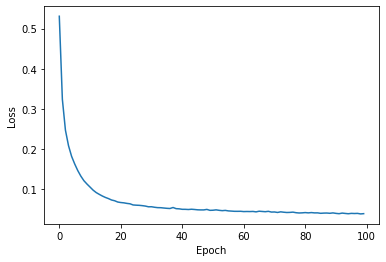

In [ ]:
# Plot loss and validation loss
plt.plot(history.history['loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

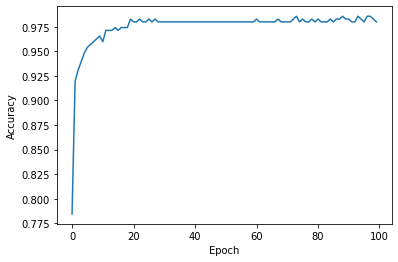

In [ ]:
# Plot accuracy and validation accuracy
plt.plot(history.history['accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()